In [176]:
# Import numpy and random for working with matrices. 
import numpy as np
import random 

# Import mnist_loader to load the MNIST dataset in numpy format.
# mnist_loader provided from https://github.com/mnielsen/neural-networks-and-deep-learning
import mnist_loader

from matplotlib import pyplot

In [177]:
# NetworkLayer
#
# The hidden layer and the output layer are groups of neurons. 
#
class NetworkLayer: 
    
    # Initialize the network layer. 
    #
    # Paramters: 
    #  - weights: a numpy matrix of initial weights (dimensions are [# of neurons x # of inputs]) 
    #      rows of weight matrix correspond to each neurons weight
    #      (row i contains the weights leading into the i'th neuron of this layer)
    #  - biases: a numpy matrix (dimensions are [# of neurons x 1]) of initial biases
    def __init__(self, weights, biases): 
        
        # self.weights
        #  Each network layer has a matrix of weights. 
        #   - The matrix of weights has a format where the rows correspond to 
        #     each hidden/output layer neuron and the columns refer to the inputs 
        #     to that layer. For example the weight in the first row, second column 
        #     of the hidden layer weights corresponds to the weight from the second
        #     input to the first hidden neuron. 
        self.weights = weights
        
        # self.biases
        #  Each network layer also has a vertex of biases. 
        #   - There is one bias value for each neuron.  
        self.biases = biases 
    

In [178]:
# NeuralNetwork
#
# This NeuralNetwork class represents a 3 layer neural network. 
# Groups of neurons form layers in the neural network. 
# The first layer is just the inputs (no need to represent these as neurons). 
# The second layer is the hidden layer. 
# The third layer is the output layer. 
# 
class NeuralNetwork: 
    
    # Initialize the network with sizes for each layer. 
    #
    # Parameters: 
    #  - input_layer_size: number of inputs 
    #  - hidden_layer_size: number of neurons in hidden layer 
    #  - output_layer_size: number of outputs in hidden layer 
    def __init__(self, input_layer_size, hidden_layer_size, output_layer_size):
        
        ### Input layer is just training data. For the MNIST data each input represents 
        ### a pixel in the input images. There are 784 inputs representing a 28*28 pixel image. 
        
        
        ### Start Hidden layer
        # Each neuron in the hidden layer has a weight connecting it to every point in the training data.
        # The hidden layer can have a variable number of neurons. Adding more neurons generally helps with 
        # training, at least up to a certain point, at which the network starts to overfit. 

        self.hidden_layer_size = hidden_layer_size
        
        # assign random initial weights 
        rand_hidden_weights = np.random.randn(hidden_layer_size, input_layer_size)
        
        # assign random initial biases 
        rand_hidden_biases = np.random.randn(hidden_layer_size, 1)

        # initialize the hidden layer 
        self.hidden_layer = NetworkLayer(rand_hidden_weights, rand_hidden_biases)
       
        ### End Hidden Layer 
        
        
        ### Start Output Layer
        # Each output neuron has a weight connecting it every output of the hidden layer. 
        # Our output layer has 10 neurons to represent one-hot encoding of the handwritten digits. 
        
        self.output_layer_size = output_layer_size 
        
        # assign random initial weights 
        rand_output_weights = np.random.randn(output_layer_size, hidden_layer_size)
        
        # assign random initial biases 
        rand_output_biases = np.random.randn(output_layer_size, 1)
        
        # initialize the output layer 
        self.output_layer = NetworkLayer(rand_output_weights, rand_output_biases)
        
        ### End Output Layer 
        
        
       
        
            
    # Train the network using training data. 
    # 
    # Parameters: 
    #  - training_data: numpy array of training data points 
    #  - test_data: numpy array of test data points 
    #  - epochs: number of times to run the training loop 
    #  - batch_size: batch size to use for training
    #  - alpha: learning rate 
    def train(self, training_data, validation_data, test_data, epochs, batch_size, alpha): 
        
        old_percent_correct = 0
        
        # Loop over all epochs 
        for i in range(epochs): 
            
            ################################
            # Start BATCH CODE
            # We ended up not using batch code since our initial results 
            # performed well. 
            ################################
            # shuffle the training data 
            #random.shuffle(training_data)
            
            # create a set of batches according to batch_size
            #batch_groups = []
            #for i in xrange(0, len(training_data), batch_size): 
            #    batch_groups.append(training_data[i:i+batch_size])
            
            # for each batch 
            #for batch in batch_groups: 
                # run forward_pass
                
                # run backpropagation (and update weights)
            ###################################
            # End BATCH CODE
            ###################################
            
            
            # Perform forward pass and backpropagation 
            for inputs,outputs in training_data: 
                self.forward_pass(inputs)
                # weights are updated in backpropagation method 
                self.backpropagation(inputs, outputs, alpha)
            
            
            correct_validation = self.run_test(validation_data, False)
            percent_correct_validation = correct_validation/float(len(validation_data)) * 100
            # Test new weights on test data and print results 
            print "Epoch "+str(i)+" validation results: ",
            print (str(correct_validation) + "/" + str(len(validation_data)) 
                  + " = " + str(percent_correct_validation) +"%") 
            if percent_correct_validation > 96: 
                break
            if percent_correct_validation > 95.5: 
                if old_percent_correct > percent_correct_validation: 
                    break
            old_percent_correct = percent_correct_validation
                
        correct_test = self.run_test(test_data, True)
        percent_correct_test = correct_test/float(len(test_data)) * 100
        print "Final Run on test data: ",
        print (str(correct_test) + "/" + str(len(test_data)) 
                  + " = " + str(percent_correct_test) +"%")

            
    # Evaluate the accuracy of the weights on the test data set. 
    #
    # Parameters: 
    #  - test_data: The test data set
    def run_test(self, test_data, print_plots): 
        
        network_test_predictions = []
        expected_test_output = []
        
        # run forward pass on the test data set and retrieve the predicted output   
        for inputs, outputs in test_data: 
            network_test_predictions.append(self.forward_pass(inputs))
            expected_test_output.append(outputs)
        
    
        # conver the one-hot encoded output into the correct digit value 
        network_test_output = np.argmax(np.asarray(network_test_predictions), axis=1)
        
        
        correct = 0
        j = 1
        if (print_plots): 
            print ""
            print "Sample of incorrect predictions from test data set"
            print "Ex = Expected, Pr = Predicted"
            print ""
            fig = pyplot.figure()
            fig.subplots_adjust(hspace=1)
        # loop over all the outputs and compare the prediction against the actual value 
        for i in range(len(expected_test_output)): 
            correct = correct + int(network_test_output[i][0] == expected_test_output[i])
            
            if (print_plots and j < 26):
                if(int(network_test_output[i][0] != expected_test_output[i])):
                    reshaped_image = test_data[i][0].reshape((28,28))
                    ax = fig.add_subplot(5,5,j)
                    ax.set_title('Ex: '+str(expected_test_output[i])+',Pr:'+str(network_test_output[i][0]))
                    imgplot = ax.imshow(reshaped_image, cmap='gray')
                    pyplot.xticks(np.array([]))
                    pyplot.yticks(np.array([]))
                    j = j+1
        if (print_plots): 
            pyplot.show()
            print ""

        return correct
        
    
    # Perform backprogation through the neural network layers and update the weights/biases matrices. 
    #
    # Paramters: 
    #  - inputs: current inputs for this training loop (one handwritten digit image)
    #  - outputs the expected outputs for this training loop (the actual digit)
    #  - alpha: learning rate 
    def backpropagation(self, inputs, outputs, alpha): 
        
        # Calculate delta of all neurons 
        # Delta is different for hidden layer neurons vs. output layer neurons 
        
        # Delta for output layer neurons 
        #
        # delta for output layer neurons = 
        #   (output of current output neuron - target) 
        #   * (output of current output neuron)  
        #   * (1 - output of current output neuron) 
        #
        # size of output deltas = size of output neuron layer (one delta for each neuron) 

        self.output_deltas = ((self.output_layer_output - outputs) 
                              * (self.output_layer_output * (1 - self.output_layer_output)))
        
        # Delta for hidden layer neurons 
        # 
        # delta for hidden layer neurons = 
        #   [for each output layer neuron(
        #     (output of output neuron - target)  
        #     * (output of output neuron) * (1 - output of output neuron) 
        #     * (output layer weight from the current hidden neuron to for loop output neuron)  )]
        #   * (output of current hidden neuron) * (1 - output of current hidden neuron)
        #
        # size of hidden deltas = size of hidden neuron layer 
        
        # calculate the summation portion of the delta 
        temp_sum = np.dot(self.output_layer.weights.transpose(), self.output_deltas)

        # calculate the hidden layer deltas 
        self.hidden_deltas = (temp_sum * self.hidden_layer_output * (1 - self.hidden_layer_output))
        
        # gradient = delta of neuron * input to neuron 
        # gradients for hidden to output weights = np.dot( delta of output neurons, outputs of hidden neurons )
        # gradients for input to hidden weights = np.dot( delta of hidden neurons, inputs to network )
        # gradient matrix should match size of weights matrix 
        self.output_gradients = np.dot(self.output_deltas, self.hidden_layer_output.transpose())
        self.hidden_gradients = np.dot(self.hidden_deltas, self.network_input.transpose())
        
        # bias gradients are equal to the deltas 
        self.output_bias_gradients = self.output_deltas
        self.hidden_bias_gradients = self.hidden_deltas
        
 
        # update amount = learning rate * -1 * gradient
        output_update_amounts = alpha * -1 * self.output_gradients 
        hidden_update_amounts = alpha * -1 * self.hidden_gradients 
        
        output_bias_update_amounts = alpha * -1 * self.output_bias_gradients
        hidden_bias_update_amounts = alpha * -1 * self.hidden_bias_gradients 
        
        
        # update the weights by the update amounts 
        self.output_layer.weights = self.output_layer.weights + output_update_amounts
        self.hidden_layer.weights = self.hidden_layer.weights + hidden_update_amounts 
        
        self.output_layer.biases = self.output_layer.biases + output_bias_update_amounts 
        self.hidden_layer.biases = self.hidden_layer.biases + hidden_bias_update_amounts 
        
    # Perform forward pass through the network with the input data 
    #
    # Parameters: 
    #  - data: input data for this training loop 
    def forward_pass(self, data): 

        
        ### Forward pass through hidden layer 

        # input for hidden layer 
        self.network_input = data
        
        # dot product of hidden layer weights and network inputs 
        hidden_layer_net_input = np.dot(self.hidden_layer.weights, self.network_input) + self.hidden_layer.biases
        
        # apply activation(sigmoid) to dot product 
        self.hidden_layer_output = self.sigmoid(hidden_layer_net_input)
        
        
        ### Forward pass through output layer 
        
        # input for output layer is output of hidden layer 
        output_layer_input = self.hidden_layer_output
        
        # dot product of output layer weights and hidden layer output 
        output_layer_net_input = np.dot(self.output_layer.weights, output_layer_input) + self.output_layer.biases 
        
        # apply activation(sigmoid) to dot product 
        self.output_layer_output = self.sigmoid(output_layer_net_input)
        
        # return output layer output (one-hot encoded prediction of the handwritten digit)
        return self.output_layer_output
        
    # sigmoid function 
    #
    # Parameters: 
    #  - t: input to sigmoid function 
    def sigmoid(self,t):
        return 1.0/(1.0+np.exp(-t))
        
    
    

Epoch 0 validation results:  9194/10000 = 91.94%
Epoch 1 validation results:  9306/10000 = 93.06%
Epoch 2 validation results:  9366/10000 = 93.66%
Epoch 3 validation results:  9468/10000 = 94.68%
Epoch 4 validation results:  9409/10000 = 94.09%
Epoch 5 validation results:  9452/10000 = 94.52%
Epoch 6 validation results:  9507/10000 = 95.07%
Epoch 7 validation results:  9491/10000 = 94.91%
Epoch 8 validation results:  9525/10000 = 95.25%
Epoch 9 validation results:  9526/10000 = 95.26%
Epoch 10 validation results:  9512/10000 = 95.12%
Epoch 11 validation results:  9495/10000 = 94.95%
Epoch 12 validation results:  9527/10000 = 95.27%
Epoch 13 validation results:  9522/10000 = 95.22%
Epoch 14 validation results:  9549/10000 = 95.49%
Epoch 15 validation results:  9556/10000 = 95.56%
Epoch 16 validation results:  9550/10000 = 95.5%
Epoch 17 validation results:  9567/10000 = 95.67%
Epoch 18 validation results:  9552/10000 = 95.52%

Sample of incorrect predictions from test data set
Ex = Expe

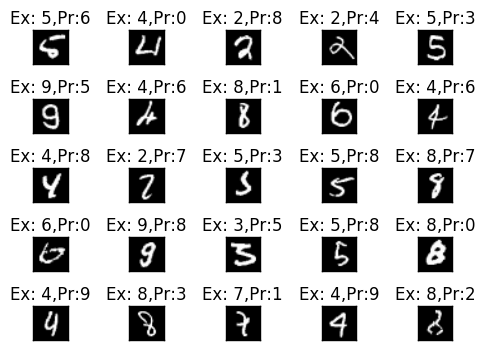


Final Run on test data:  9527/10000 = 95.27%


In [179]:
# mnist_loader provided from https://github.com/mnielsen/neural-networks-and-deep-learning
# use mnist_loader function to load MNIST data as numpy formatted arrays 
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()


# initialize the Neural Network with 40 hidden neurons (2nd parameter)
neuralnet = NeuralNetwork(len(training_data[0][0]), 40, 10)

# train the neural net over 1000 epochs (3rd parameter) with learning rate 0.7 (5th parameter)
neuralnet.train(training_data, validation_data, test_data, 1000, 777, .7)